In [1]:
import numpy as np
import scipy.special

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
cluster='M44'
name='M44'
p1 = figure(title=name+" brightness distribution",tools="save",
            background_fill_color="#E8DDCB")
#Ruprecht147
if name=='Ruprecht 147':
    k2=[7.954,9.338,9.178,9.11,8.588,9.339,9.592,9.316,8.437,9.105,8.002,8.626]
    ps=[12.2679,12.2762,11.673,13.1895,8.637,8.1895,8.3194,17.3112,13.1654,10.436,16.2758,12.831,13.0893,12.5339]

else:
    ps = [float(line.strip()) for line in open("share/panstarrs_match/" + cluster + "_panstarrs_Jmag.txt", 'r')]
    k2 =[float(line.strip()) for line in open("share/2mass_match/" + cluster + "_2mass_Jmag.txt", 'r')]
#print(k2)
hist_k2, edges_k2= np.histogram(k2, density=True, bins=np.arange(7,18))
hist_ps, edges_ps= np.histogram(ps, density=True, bins=np.arange(7,18))
p1.quad(top=hist_k2, bottom=0, left=edges_k2[:-1], right=edges_k2[1:],
        fill_color="#35bf37", line_color="#35bf37",alpha=0.7,legend='2MASS')
p1.quad(top=hist_ps, bottom=0, left=edges_ps[:-1], alpha=0.7,right=edges_ps[1:],
        fill_color="#ef32aa", line_color="#ef32aa",legend='Pan-STARRS')
p1.legend.location = "top_left"
p1.legend.background_fill_color = "darkgrey"
p1.xaxis.axis_label = 'Jmag'
p1.yaxis.axis_label = 'number of objects'

show(p1)


IOError: [Errno 2] No such file or directory: 'share/panstarrs_match/M44_panstarrs_Jmag.txt'

/work1/eilin/data/CLUSTERS_01/k2-panstarrs-sampedro
        EPIC results     T
0  219599554      M1  3700
1  219519432      K7  4070
2  219716873      M4  3200
3  219396051      G8  5490
4  219810798      K7  4070 
         EPIC  KEP_Mag KEP_Flag
0  219622634    8.440       BV
1  200062550      NaN      NaN
2  200062557      NaN      NaN
3  219605951   10.387      gri
4  200062558      NaN      NaN


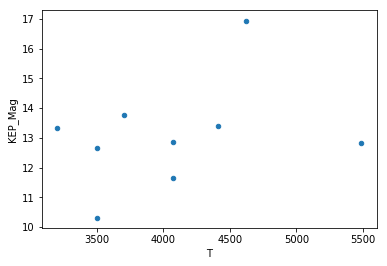

In [28]:
import pandas as pd
%cd /work1/eilin/data/CLUSTERS_01/k2-panstarrs-sampedro
%matplotlib inline
cluster='Ruprecht_147'
name='Ruprecht_147'
df = pd.read_csv("cats/" + cluster + "_k2_search.txt",
                 delimiter='\t',
                 header=0, 
                 usecols=['K2 ID','KEP Mag','Kep Flag'],
                 skiprows=[1],
                )
df.rename(index=int,columns={'K2 ID' : 'EPIC','KEP Mag':'KEP_Mag','Kep Flag':'KEP_Flag'},inplace=True)
df2 = pd.read_csv('cats/' + cluster + '_specs_T.csv')

print(df2.head(),'\n',df.head())

df3 = df.merge(df2, how='inner', on='EPIC')

df3.head()

df3.plot(x='T',y='KEP_Mag' ,kind='scatter')